## Part 1 Understanding data

* The data is from https://www.kaggle.com/datasets/fccuser/2021-new-coder-survey 



In [1]:
import re
import pandas as pd 
import matplotlib.pyplot as plt
survey = pd.read_csv("/kaggle/input/2021-new-coder-survey/2021 New Coder Survey.csv") 
 

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
!ls /kaggle/input/2021-new-coder-survey/

'2021 New Coder Survey.csv'


In [3]:
survey.head()

,Timestamp,1. What is your biggest reason for learning to code?,2. What methods have you used to learn about coding? Please select all that apply.,3. Which online learning resources have you found helpful? Please select all that apply.,"4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.","5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.","6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.",7. About how many hours do you spend learning each week?,8. About how many months have you been programming?,"9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?",...,45. Please tell us how satisfied you are with each of these following aspects of your present job [Job security],45. Please tell us how satisfied you are with each of these following aspects of your present job [Work-life balance],45. Please tell us how satisfied you are with each of these following aspects of your present job [Professional growth or leadership opportunities],45. Please tell us how satisfied you are with each of these following aspects of your present job [Workplace/company culture],45. Please tell us how satisfied you are with each of these following aspects of your present job [Diverse and inclusive work environment],45. Please tell us how satisfied you are with each of these following aspects of your present job [Weekly workload],46. About how many minutes does it take you to get to work each day?,47. Have you served in your country's military before?,48. Do you currently receive disability benefits from your government?,49. Do you have high speed internet at your home?
0,7/1/2021 10:10:23,To succeed in current career,"Online resources, Books, In-person bootcamps, ...","freeCodeCamp, Mozilla Developer Network (MDN),...","conferences, workshops, Meetup.com events",The Changelog,"CS Dojo, freeCodeCamp",4.0,120,NaN,...,Somewhat satisfied,Somewhat dissatisfied,I do not know,Somewhat satisfied,Somewhat satisfied,Very dissatisfied,I work from home,No,No,Yes
1,7/1/2021 10:31:01,To change careers,"Online resources, Books, Online bootcamps","freeCodeCamp, Mozilla Developer Network (MDN),...",I haven't attended any in-person coding-relate...,"The Changelog, Code Newbie Podcast","Adrian Twarog, Code with Ania Kubów, Coder Cod...",10.0,6,30,...,Very dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,15 to 29 minutes,No,Yes,Yes
2,7/1/2021 10:42:31,To change careers,"Online resources, Books, Hackathons, Meetup.co...","freeCodeCamp, Mozilla Developer Network (MDN),...",Meetup.com events,I haven't listened to any podcasts,"AmigosCode, Dev Ed, freeCodeCamp, Kevin Powell...",30.0,48,300,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,I am not working,No,No,Yes
3,7/1/2021 11:06:43,As a hobby,"Online resources, Books","freeCodeCamp, Mozilla Developer Network (MDN),...",I haven't attended any in-person coding-relate...,"Darknet Diaries, Real Python Podcast","freeCodeCamp, Traversy Media",NaN,36,0,...,NaN,NaN,NaN,NaN,NaN,NaN,I am not working,No,No,No
4,7/1/2021 11:14:31,To start your first career,"Online resources, Books, Online bootcamps","freeCodeCamp, Stack Overflow, Coursera, Udemy",I haven't attended any in-person coding-relate...,Talk Python to Me,"freeCodeCamp, The Net Ninja, Traversy Media",2.0,24,5000,...,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,45 to 60 minutes,No,No,Yes


In [4]:
survey.columns

Index(['Timestamp', '1. What is your biggest reason for learning to code?',
       '2. What methods have you used to learn about coding? Please select all that apply.',
       '3. Which online learning resources have you found helpful? Please select all that apply.',
       '4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.',
       '5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.',
       '6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.',
       '7. About how many hours do you spend learning each week?',
       '8. About how many months have you been programming?',
       '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?',
       '10. Are you already employed in a software development job

In [5]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 63 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                      --------------  -----  
 0   Timestamp                                                                                                                                                                   18126 non-null  object 
 1   1. What is your biggest reason for learning to code?                                                                                                                        17991 non-null  object 
 2   2. What methods have you used to learn about coding? Please select all that apply.

In [6]:
survey.keys()

Index(['Timestamp', '1. What is your biggest reason for learning to code?',
       '2. What methods have you used to learn about coding? Please select all that apply.',
       '3. Which online learning resources have you found helpful? Please select all that apply.',
       '4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.',
       '5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.',
       '6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.',
       '7. About how many hours do you spend learning each week?',
       '8. About how many months have you been programming?',
       '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?',
       '10. Are you already employed in a software development job

#### Chosen columns for machine learning
*  `Income` as the target 
* Created a dataframe with `Area`,`Age`,`HighestEducation`,`ProgramMonths`,`DegreeStudied`,`CurrentIndustry`,`CodingReasons`,`Gender`,`Income`

In [7]:



df = pd.DataFrame(columns=['Area','Age','HighestEducation','ProgramMonths','DegreeStudied','CurrentIndustry','CodingReasons','Gender','Income'])
df['Area'] = survey.iloc[:, 26] 
df['Age'] = survey.iloc[:, 23]    
df['HighestEducation'] = survey.iloc[:, 32]  
df['ProgramMonths'] = survey.iloc[:, 8]
df['DegreeStudied'] = survey.iloc[:, 33] 
df['CurrentIndustry'] = survey.iloc[:, 21] 
df['CodingReasons'] = survey.iloc[:, 1] 
df['Gender'] = survey.iloc[:, 24] 
df['Income'] = survey.iloc[:, 22]    
df.head()


#print(survey.columns)

,Area,Age,HighestEducation,ProgramMonths,DegreeStudied,CurrentIndustry,CodingReasons,Gender,Income
0,Europe and Central Asia,33.0,"Professional degree (MBA, MD, JD, etc.)",120,"Computer science, computer engineering, or sof...",Software development and IT,To succeed in current career,Prefer not to say,NaN
1,Latin America and Caribbean,38.0,Bachelor’s degree,6,"Environmental science (e.g., earth sciences, s...",Oilfield,To change careers,Male,"Under $1,000"
2,North America,NaN,Master's degree (non-professional),48,Art,I am not currently working,To change careers,Male,NaN
3,Sub-Saharan Africa,19.0,High school diploma or equivalent (GED),36,"Another engineering discipline (e.g., civil, e...",I am not currently working,As a hobby,Male,NaN
4,East Asia and Pacific,35.0,Bachelor’s degree,24,"Computer science, computer engineering, or sof...",Finance,To start your first career,Male,"$40,000 to $49,999"


In [8]:
num_records = df.shape[0]
print("Total records in df:", num_records)


Total records in df: 18126


In [9]:
#Checking Area Duplicates

# Create a new dataframe for cleaning
df_clean = df.copy()

# Count the number of duplicate rows in the DataFrame/total responses that are not null
duplicate_count = df_clean.duplicated().sum()
print(f"Number of duplicate rows in the DataFrame: {duplicate_count}")






Number of duplicate rows in the DataFrame: 583


**Process of duplicates being deleted:**


In [10]:
#duplicates being dropped

df_clean.drop_duplicates(inplace=True)


duplicate_count_clean = df_clean.duplicated().sum()
print(f"Number of duplicate rows in the cleaned DataFrame: {duplicate_count_clean}")

#duplicate rows are now deleted.

Number of duplicate rows in the cleaned DataFrame: 0


In [11]:
df_clean.isna().sum()


Area                 512
Age                  642
HighestEducation     542
ProgramMonths       1155
DegreeStudied        781
CurrentIndustry      869
CodingReasons         66
Gender               288
Income              2359
dtype: int64

In [12]:
#Cleaning Area


num_missing_area = df_clean['Area'].isnull().sum()
unique_area = df_clean['Area'].unique()
total_area_response = len(df_clean['Area'])



print("Total Responses:", total_area_response)
print("Number of missing 'Area' values:", num_missing_area)
print("Unique Area values:", unique_area)

#what should you do with the missing values in area?
#missing values represents about 3% of my data 
#therefore i will be dropping them as this would have limited effect on my(modelling results)-findtherightword

Total Responses: 17543
Number of missing 'Area' values: 512
Unique Area values: ['Europe and Central Asia' 'Latin America and Caribbean' 'North America'
 'Sub-Saharan Africa' 'East Asia and Pacific' 'South Asia' nan
 'Southeast Asia' 'Middle East and North Africa']


In [13]:
#After 

# Drop rows with missing values in the 'Area' column
df_clean.dropna(subset=['Area'], inplace=True)

num_missing_area_clean = df_clean['Area'].isnull().sum()
print(f"Number of missing 'Area' values: {num_missing_area_clean}")



Number of missing 'Area' values: 0


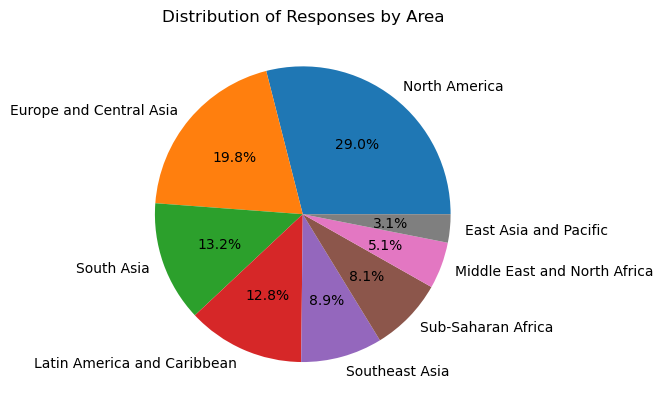

In [14]:
import matplotlib.pyplot as plt


area_counts = df_clean['Area'].value_counts()


plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Responses by Area')


plt.show()




In [15]:
# Cleaning Age in df_clean

num_missing_age = df_clean['Age'].isnull().sum()
unique_age = df_clean['Age'].unique()
total_age_response = len(df_clean['Age'])

num_under_18 = len(df_clean[df_clean['Age'] < 18])

print("Total Responses:", total_age_response)
print("Number of missing 'Age' values:", num_missing_age)
print("Unique Age values:", unique_age)
print("Number of respondents under 18 years old:", num_under_18)

# after using describe i realised there were some strange responses such as min value being 6
# i decided to check for the amount of values under 18 as everything else is harmful to income prediction
print(df_clean['Age'].describe())

#decided to do under 18 and remove as less likely for them to be employed by a company and u21 was a big chunk responsdents.(4.6k vs 1.8k)



Total Responses: 17031
Number of missing 'Age' values: 413
Unique Age values: [ 33.   38.    nan  19.   35.   27.   24.   23.   50.   26.   44.   25.
  21.   20.   22.   29.   46.   28.   37.   39.   30.   31.   15.   32.
  40.   45.   36.   47.   41.   13.   49.  100.   34.   18.   16.   42.
  14.   55.   17.   56.   63.   57.   59.   75.   43.   48.   60.   53.
  66.   52.   65.   54.   51.   62.   77.   12.   61.   11.   70.    6.
  10.   58.   99.   69.   76.   64.   71.   83.   19.5  16.5  74.   72.
  67.   73.   68.   80.    8.   78.    9.   95.   16.7  89.   79.  120.
  82.   84.   15.5  14.5  88. ]
Number of respondents under 18 years old: 1751
count    16618.000000
mean        27.261084
std         10.169087
min          6.000000
25%         20.000000
50%         25.000000
75%         32.000000
max        120.000000
Name: Age, dtype: float64


In [16]:
#dropping ages <18 

df_clean = df_clean[df_clean['Age'].isnull() | (df_clean['Age'] >= 18)]

# it seems remove the ages u18 seem

# recalculate the variables after dropping respondents under 18
num_missing_age = df_clean['Age'].isnull().sum()
unique_age = df_clean['Age'].unique()
total_age_response = len(df_clean['Age'])

num_under_18 = len(df_clean[df_clean['Age'] < 18])

print(df_clean['Age'].describe())

print(f"Total Responses: {total_age_response}")

print(f"Number of missing 'Age' values: {num_missing_age}")

print(f"Unique Age values: {unique_age}")

print(f"Number of respondents under 18 years old: {num_under_18}")




count    14867.000000
mean        28.655310
std          9.839937
min         18.000000
25%         21.000000
50%         26.000000
75%         33.000000
max        120.000000
Name: Age, dtype: float64
Total Responses: 15280
Number of missing 'Age' values: 413
Unique Age values: [ 33.   38.    nan  19.   35.   27.   24.   23.   50.   26.   44.   25.
  21.   20.   22.   29.   46.   28.   37.   39.   30.   31.   32.   40.
  45.   36.   47.   41.   49.  100.   34.   18.   42.   55.   56.   63.
  57.   59.   75.   43.   48.   60.   53.   66.   52.   65.   54.   51.
  62.   77.   61.   70.   58.   99.   69.   76.   64.   71.   83.   19.5
  74.   72.   67.   73.   68.   80.   78.   95.   89.   79.  120.   82.
  84.   88. ]
Number of respondents under 18 years old: 0


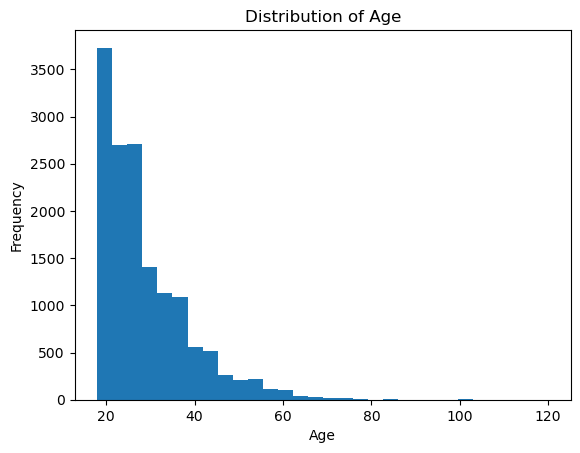

20.0    1010
21.0     944
23.0     939
19.0     929
22.0     904
        ... 
78.0       1
80.0       1
19.5       1
99.0       1
88.0       1
Name: Age, Length: 73, dtype: int64


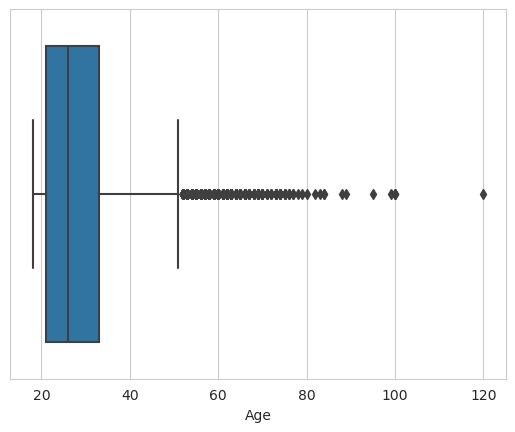

In [17]:
import matplotlib.pyplot as plt

plt.hist(df_clean['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# As I am not sure how to handle missing age values, I created a histogram to help understand the distribution
print(df_clean['Age'].value_counts())

# As the results are right-skewed, I may be inclined to use a boxplot to visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.boxplot(x=df_clean['Age'])
plt.show()

In [18]:
pd.set_option('display.max_rows', None)
age_counts = df_clean['Age'].value_counts().sort_index()
print(age_counts)

18.0      845
19.0      929
19.5        1
20.0     1010
21.0      944
22.0      904
23.0      939
24.0      854
25.0      771
26.0      704
27.0      607
28.0      626
29.0      493
30.0      521
31.0      393
32.0      415
33.0      372
34.0      340
35.0      339
36.0      294
37.0      228
38.0      231
39.0      188
40.0      221
41.0      153
42.0      145
43.0      110
44.0      129
45.0      128
46.0       98
47.0       86
48.0       83
49.0       60
50.0       83
51.0       62
52.0       65
53.0       50
54.0       43
55.0       58
56.0       44
57.0       36
58.0       31
59.0       33
60.0       39
61.0       16
62.0       19
63.0       16
64.0       13
65.0       12
66.0       16
67.0        5
68.0        5
69.0        9
70.0        7
71.0        3
72.0        3
73.0        7
74.0        6
75.0        5
76.0        3
77.0        2
78.0        1
79.0        1
80.0        1
82.0        1
83.0        1
84.0        2
88.0        1
89.0        1
95.0        1
99.0        1
100.0 

In [19]:
df_clean = df_clean[df_clean['Age'] <= 65]

num_over_65 = len(df_clean[df_clean['Age'] > 65])
print(f"Number of respondents over 65 years old: {num_over_65}")
print(f"Number of missing 'Age' values: {num_missing_age}")
print(df_clean['Age'].describe())



Number of respondents over 65 years old: 0
Number of missing 'Age' values: 413
count    14781.000000
mean        28.392835
std          9.216382
min         18.000000
25%         21.000000
50%         26.000000
75%         33.000000
max         65.000000
Name: Age, dtype: float64


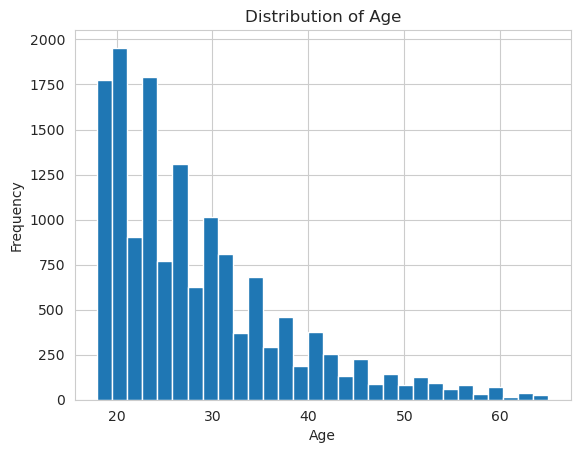

20.0    1010
21.0     944
23.0     939
19.0     929
22.0     904
24.0     854
18.0     845
25.0     771
26.0     704
28.0     626
27.0     607
30.0     521
29.0     493
32.0     415
31.0     393
33.0     372
34.0     340
35.0     339
36.0     294
38.0     231
37.0     228
40.0     221
39.0     188
41.0     153
42.0     145
44.0     129
45.0     128
43.0     110
46.0      98
47.0      86
48.0      83
50.0      83
52.0      65
51.0      62
49.0      60
55.0      58
53.0      50
56.0      44
54.0      43
60.0      39
57.0      36
59.0      33
58.0      31
62.0      19
63.0      16
61.0      16
64.0      13
65.0      12
19.5       1
Name: Age, dtype: int64


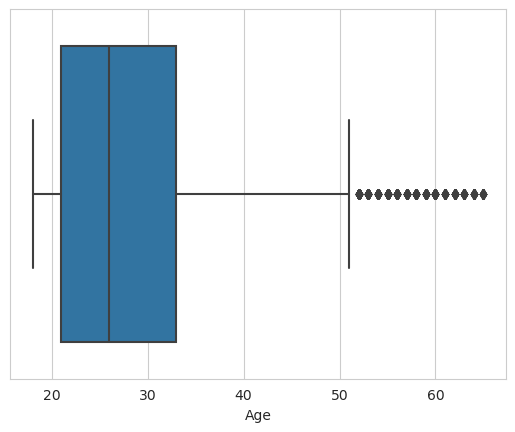

In [20]:
import matplotlib.pyplot as plt

plt.hist(df_clean['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# As I am not sure how to handle missing age values, I created a histogram to help understand the distribution
print(df_clean['Age'].value_counts())

# As the results are right-skewed, I may be inclined to use a boxplot to visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.boxplot(x=df_clean['Age'])
plt.show()



In [21]:
df_clean.dropna(subset=['Age'], inplace=True)

num_missing_age_clean = df_clean['Age'].isnull().sum()

print(f"Number of missing 'Age' values: {num_missing_age_clean}")

#reduced value to 18-65 dropped missing values as i felt these were outliers/errors/retiredpupils who wouldnt be making an income so irrelevant
#try to show proof by visualising the ages above 65 years and the income there were getting with the original df to see if it supports my thesis

Number of missing 'Age' values: 0


In [22]:
#Cleaning HighestEducation
#What is the highest degree or level of school you have completed?	

missing_HighestEducation = df_clean['HighestEducation'].isnull().sum()
print(f"\n Number of missing 'HighestEducation' values: {missing_HighestEducation}")

unique_HighestEducation = df_clean['HighestEducation'].unique()
print(unique_HighestEducation)

print(f"\n Highest Education frequencies:\n{df_clean['HighestEducation'].value_counts()}")



 Number of missing 'HighestEducation' values: 109
['Professional degree (MBA, MD, JD, etc.)' 'Bachelor’s degree'
 'High school diploma or equivalent (GED)'
 'Some college credit, no degree' "Master's degree (non-professional)"
 'Associate’s degree' 'Trade, technical, or vocational training'
 'No high school (secondary school)' 'Some high school' nan 'Ph.D.']

 Highest Education frequencies:
Bachelor’s degree                           5164
Some college credit, no degree              2686
High school diploma or equivalent (GED)     2621
Master's degree (non-professional)          1051
Some high school                             865
Professional degree (MBA, MD, JD, etc.)      716
Trade, technical, or vocational training     659
Associate’s degree                           605
No high school (secondary school)            186
Ph.D.                                        119
Name: HighestEducation, dtype: int64


In [23]:
#as value of missing is low (less than 1% ive just decided to impute them)
missing_HighestEducation = df_clean['HighestEducation'].isnull().sum()
mode_HighestEducation = df_clean['HighestEducation'].mode()[0]
df_clean['HighestEducation'].fillna(mode_HighestEducation, inplace=True)
print(f"Number of missing 'HighestEducation' values: {missing_HighestEducation}")


Number of missing 'HighestEducation' values: 109


In [24]:
print(f"Number of missing 'HighestEducation' values: {missing_HighestEducation}")

print(f"Highest Education frequencies:\n{df_clean['HighestEducation'].value_counts()}")


Number of missing 'HighestEducation' values: 109
Highest Education frequencies:
Bachelor’s degree                           5273
Some college credit, no degree              2686
High school diploma or equivalent (GED)     2621
Master's degree (non-professional)          1051
Some high school                             865
Professional degree (MBA, MD, JD, etc.)      716
Trade, technical, or vocational training     659
Associate’s degree                           605
No high school (secondary school)            186
Ph.D.                                        119
Name: HighestEducation, dtype: int64


In [25]:
df_clean['HighestEducation'].isnull().sum()

0

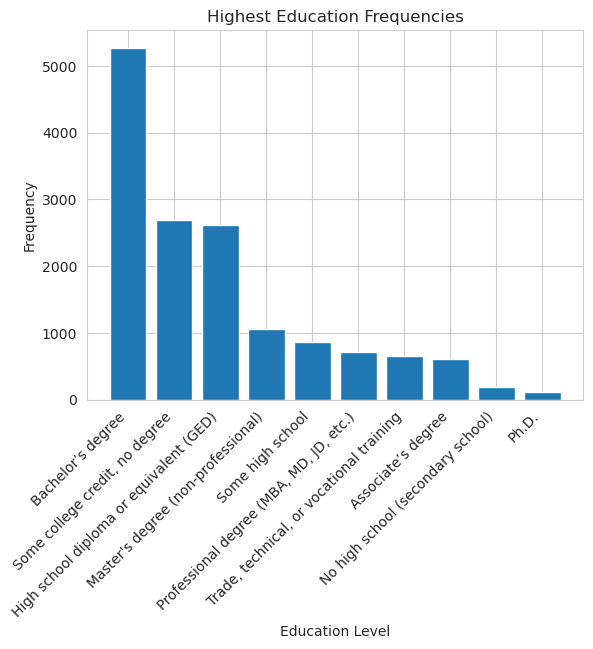

In [26]:
#Visualise HighestEducation

import matplotlib.pyplot as plt

# frequencies
ed_freq = df_clean['HighestEducation'].value_counts()

plt.bar(ed_freq.index, ed_freq.values)

# rotate to prevent overlapping
plt.xticks(rotation=45, ha='right')

# labels and title 
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.title("Highest Education Frequencies")

plt.show()


In [27]:
df_clean['ProgramMonths'].isnull().sum()

850

In [28]:
#ProgramMonth


df_clean['ProgramMonths'] = pd.to_numeric(df_clean['ProgramMonths'], errors='coerce')
df_clean['ProgramMonths'] = df_clean['ProgramMonths'].apply(lambda x: round(x) if not pd.isna(x) else x)

# print the results
total_month_response = len(df_clean['ProgramMonths'])
#missing_ProgramMonths = df_clean['ProgramMonths'].isnull().sum()
unique_months = df_clean['ProgramMonths'].unique()
counts = df_clean['ProgramMonths'].value_counts()


print("Total Responses:", total_month_response)

#print("Number of missing 'ProgramMonths' values:", missing_ProgramMonths)
print("Unique ProgramMonths values:", unique_months)
print(counts)
print("Number of missing 'ProgramMonths' values:",df_clean['ProgramMonths'].isnull().sum())


Total Responses: 14781
Unique ProgramMonths values: [120 6 36 24 50 30 12 8 48 15 7 96 14 3 nan 18 9 40 1 72 4 52 230 16 60 10
 2 26 13 240 25 5 144 42 150 11 0 23 180 20 58 28 220 55 38 300 99 430 27
 80 47 105 17 70 360 19 39 1000 69 22 35 78 33 32 63 666 34 45 100 21 54
 31 43 216 88 480 67 190 312 400 75 61 122 57 204 350 276 56 44
 100000000000000019962821758874845114793984 29 500 66 200 108 53 288 94 84
 178 420 264 128 90 68 492 9000 516 250 110 46 170 168 372 156 252 65 132
 432 1200 49 5000 257 140 134 92 109 118 4800 37 336 64 85 130 121 71 104
 160 192 1500 148 51 384 396 2400 129]
0                                             2272
1                                             2231
2                                             1267
3                                             1025
12                                             918
6                                              843
24                                             658
4                                          

In [29]:
df_clean['ProgramMonths'].isnull().sum()

850

In [30]:
df_clean = df_clean[df_clean['ProgramMonths'] <= 120]

# print the results
total_month_response = len(df_clean['ProgramMonths'])
#missing_ProgramMonths = df_clean['ProgramMonths'].isnull().sum()
unique_months = df_clean['ProgramMonths'].unique()
counts = df_clean['ProgramMonths'].value_counts()


print("Total Responses:", total_month_response)
print("Number of missing 'ProgramMonths' values:", df_clean['ProgramMonths'].isnull().sum())
print("Unique ProgramMonths values:", unique_months)
#print(counts)


Total Responses: 13738
Number of missing 'ProgramMonths' values: 0
Unique ProgramMonths values: [120 6 36 24 50 30 12 8 48 15 7 96 14 3 18 9 40 1 72 4 52 16 60 10 2 26 13
 25 5 42 11 0 23 20 58 28 55 38 99 27 80 47 105 17 70 19 39 69 22 35 78 33
 32 63 34 45 100 21 54 31 43 88 67 75 61 57 56 44 29 66 108 53 94 84 90 68
 110 46 65 49 92 109 118 37 64 85 71 104 51]


In [31]:
df_clean['ProgramMonths'].isnull().sum()

0

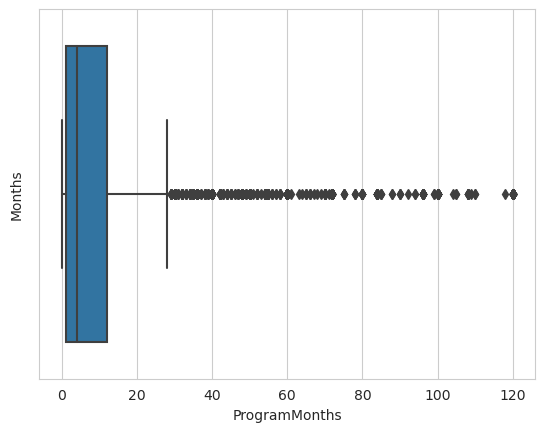

In [32]:
import seaborn as sns


df_clean['ProgramMonths'] = pd.to_numeric(df_clean['ProgramMonths'], errors='coerce')

sns.boxplot(x=df_clean['ProgramMonths'].dropna())


plt.xlabel('ProgramMonths')
plt.ylabel('Months')


plt.show()


In [33]:
#DegreeStudied

missing_degree = df_clean['DegreeStudied'].isnull().sum()
unique_degree = df_clean['DegreeStudied'].unique()
total_degree_response = len(df_clean['DegreeStudied'])

print("Total Responses:", total_degree_response)
print("Number of missing 'DegreeStudied' values:", missing_degree)
#print("Unique DegreeStudied values:", unique_degree)


Total Responses: 13738
Number of missing 'DegreeStudied' values: 242


In [34]:
unique_degree = df_clean['DegreeStudied'].nunique()

print('Number of unique values:', unique_degree)

Number of unique values: 775


In [35]:

#text classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# converting text to lowercase and dropping missing values
df_clean['DegreeStudied'] = df_clean['DegreeStudied'].str.lower()
df_clean = df_clean.dropna(subset=['DegreeStudied'])

#TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df_clean['DegreeStudied'])

# KMeans 12 clusters
kmeans = KMeans(n_clusters=12, random_state=1)




# TF-IDF matrix fitted to kmeans
kmeans.fit(tfidf)

# define clusters of degrees and the keywords to match for each cluster

clusters_of_degree = {
    'Computer Science': ['computer science', 'information technology','cyber security','software','web','web development','computing'],
    'Mathematics and Statistics': ['mathematics', 'statistics', 'data analysis','data science','economics','economoy'],
    'Natural Sciences': ['biology', 'chemistry', 'physics','natural science','science','geography','geology'],
    'Humanities & Social Sciences': ['psychology', 'sociology', 'political science','social','history', 'philosophy', 'literature','language','archaeology','linguistics'],
    'Engineering': ['engineering','another engineering discipline ','Engineering','mechanical engineering', 'electrical engineering', 'civil engineering'],
    'Business and Management': ['accounting', 'finance', 'marketing'],
    'Health Sciences': ['medicine', 'nursing', 'pharmacy'],
    'Education': ['education','teaching', 'curriculum design', 'educational administration'],
    'Law': ['law','criminal law', 'corporate law', 'constitutional law','criminology'],
    'Fine Arts': ['painting and drawing', 'sculpture', 'photography','fine','performing', 'art'],
    'Undecided/No Major/Did Not Attend University': ['undecided', 'no major', 'no degree',"didn't attend",'did not study'],
    'Other':[]
}

# mapping each degree name to its corresponding cluster
    
cluster_dict = {}
unmatched_degrees = []
for i, degree in enumerate(df_clean['DegreeStudied']):
    matched = False
    for cluster, keywords in clusters_of_degree.items():
        if any(keyword in degree for keyword in keywords):
            cluster_dict[degree] = cluster
            matched = True
            break
    if not matched:
        cluster_dict[degree] = 'Other'
        clusters_of_degree['Other'].append(degree)

# prints out cluster dict and their corresponding degree names
for cluster, degrees in clusters_of_degree.items():
    print(f"{cluster}:")
    for degree in degrees:
        print(f"- {degree}")
    print()

           
# updates DegreeStudied column in the original dataframe with the updated cluster names
df_clean['DegreeStudied'] = df_clean['DegreeStudied'].map(cluster_dict)
    
print(df_clean['DegreeStudied'].value_counts())


if unmatched_degrees:
    print("Unmatched degrees:")
    for degree in unmatched_degrees:
        print(f"- {degree}")
else:
    print("All degrees matched to clusters.")

Computer Science:
- computer science
- information technology
- cyber security
- software
- web
- web development
- computing

Mathematics and Statistics:
- mathematics
- statistics
- data analysis
- data science
- economics
- economoy

Natural Sciences:
- biology
- chemistry
- physics
- natural science
- science
- geography
- geology

Humanities & Social Sciences:
- psychology
- sociology
- political science
- social
- history
- philosophy
- literature
- language
- archaeology
- linguistics

Engineering:
- engineering
- another engineering discipline 
- Engineering
- mechanical engineering
- electrical engineering
- civil engineering

Business and Management:
- accounting
- finance
- marketing

Health Sciences:
- medicine
- nursing
- pharmacy

Education:
- education
- teaching
- curriculum design
- educational administration

Law:
- law
- criminal law
- corporate law
- constitutional law
- criminology

Fine Arts:
- painting and drawing
- sculpture
- photography
- fine
- performing
- a

In [36]:
unique_degrees_new = df_clean['DegreeStudied'].unique()
total_degree_count_new = len(df_clean['DegreeStudied'])
missing_degree_count_new = df_clean['DegreeStudied'].isnull().sum()

print(f"Number of unique degree names after clustering: {unique_degrees_new}")
print(f"Number of missing 'DegreeStudied' values:, {missing_degree_count_new}")
print(f"Total number of 'DegreeStudied' values:, {total_degree_count_new}")

Number of unique degree names after clustering: ['Computer Science' 'Natural Sciences' 'Engineering'
 'Business and Management' 'Undecided/No Major/Did Not Attend University'
 'Fine Arts' 'Mathematics and Statistics' 'Other'
 'Humanities & Social Sciences' 'Education' 'Law' 'Health Sciences']
Number of missing 'DegreeStudied' values:, 0
Total number of 'DegreeStudied' values:, 13496


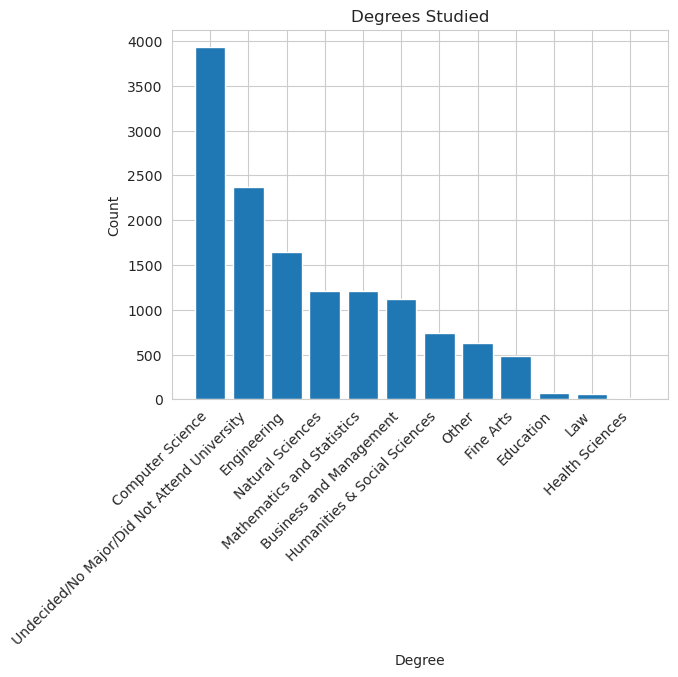

In [37]:
#DegreeStudied Visualised

import matplotlib.pyplot as plt


degrees_count = df_clean['DegreeStudied'].value_counts()
plt.bar(degrees_count.index, degrees_count.values)

plt.xticks(rotation=45, ha='right')

plt.title('Degrees Studied')
plt.xlabel('Degree')
plt.ylabel('Count')

# show the plot
plt.show()


In [38]:
#CurrentIndustry

unique_industry_count = df_clean['CurrentIndustry'].nunique()

print('Number of unique values:', unique_industry_count)

industry_counts = df_clean['CurrentIndustry'].value_counts()
print(industry_counts)


Number of unique values: 1080
I am not currently working                                                                                                                                                 5284
Software development and IT                                                                                                                                                2192
Education                                                                                                                                                                   704
Office and administrative support                                                                                                                                           512
Health care                                                                                                                                                                 489
Sales                                                                                     

In [39]:
# dictionary maps the current categories to new categories
industry = {
    'Software development and IT': 'Software development and IT',
    'Education': 'Education',
    'Office and administrative support': 'Office',
    'Health care': 'Healthcare',
    'Sales': 'Sales',
    'Food and beverage': 'Food',
    'Finance': 'Finance',
    'Arts, entertainment, sports, or media': 'Arts',
    'Architecture or physical engineering': 'Engineering',
    'Transportation': 'Transportation',
    'Construction and extraction': 'Construction',
    'Legal': 'Legal',
    'I am not currently working': 'Unemployed',
    'Farming, fishing, and forestry': 'Other',
    'Law enforcement and fire and rescue': 'Other'
}

#########
# Replace the categories 
df_clean['CurrentIndustry'] = df_clean['CurrentIndustry'].replace(industry)


industry_counts = df_clean['CurrentIndustry'].value_counts()

# Group industries with less than 100 responses as "Other"
industry_counts['Other'] = industry_counts[industry_counts < 100].sum()
industry_counts = industry_counts[industry_counts >= 100]


print(industry_counts)

missing_values = df_clean['CurrentIndustry'].isnull().sum()
print('Number of missing values:', missing_values)


Unemployed                     5284
Software development and IT    2192
Education                       704
Office                          512
Healthcare                      489
Sales                           448
Food                            390
Finance                         385
Arts                            350
Engineering                     260
Transportation                  230
Construction                    206
Other                          1556
Name: CurrentIndustry, dtype: int64
Number of missing values: 359


<AxesSubplot:>

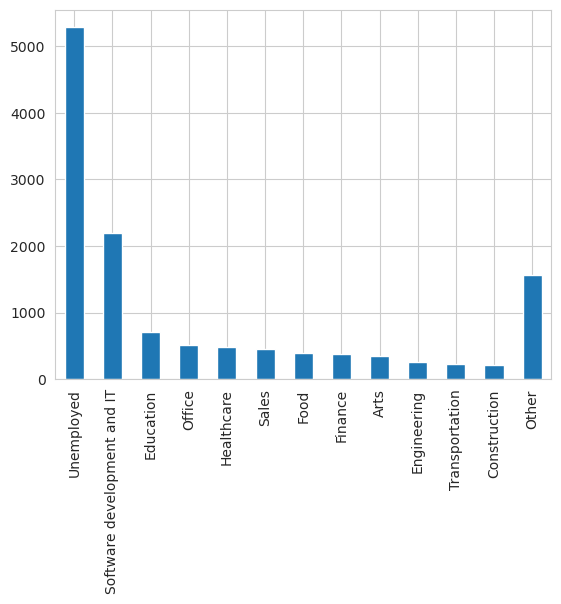

In [40]:
#Visualise CurrentIndustry
df_clean.dropna(subset=['CurrentIndustry'], inplace=True)
industry_counts.plot(kind='bar')

In [41]:
#CodingReason

unique_reason = df_clean['CodingReasons'].unique()

#print('Number of unique values:', unique_reason)

reason_counts = df_clean['CodingReasons'].value_counts()
print(reason_counts)


To change careers                                                                                                                                                                                                                                                                                                                                                                                                                                               4344
To start your first career                                                                                                                                                                                                                                                                                                                                                                                                                                      3251
To start a business or to freelance                                                           

In [42]:
# dictionary new reasons

reasons = {
    'To change careers': 'Change careers',
    'To start your first career': 'Start first career',
    'To start a business or to freelance': 'Start business/freelance',
    'To succeed in current career': 'Succeed in current career',
    'As a hobby': 'Hobby',
    'To create art or entertainment': 'Create art/entertainment',
    'To meet school requirements': 'Meet school requirements',
}

# Replace reasons 
df_clean['CodingReasons'] = df_clean['CodingReasons'].replace(reasons)

reason_counts = df_clean['CodingReasons'].value_counts()

# Groups less than 165 responses as "Other"
other_count = reason_counts[reason_counts < 165].sum()
reason_counts = reason_counts[reason_counts >= 165]
reason_counts['Other'] = other_count #not a lot of missing values

print(reason_counts)



Change careers               4344
Start first career           3251
Start business/freelance     1784
Succeed in current career    1682
Hobby                        1071
Create art/entertainment      312
Other                         658
Name: CodingReasons, dtype: int64


In [43]:
df_clean.dropna(subset=['CodingReasons'], inplace=True)
df_clean["CodingReasons"].isnull().sum()


0

In [44]:
df_clean['CurrentIndustry'] = df_clean['CurrentIndustry'].replace(industry)

In [45]:
print(df_clean['CurrentIndustry'].unique())


['Software development and IT' 'Oilfield ' 'Unemployed' ...
 'Call Center for the Internet' 'Automation and Control Engineering'
 'Content Moderator (social media)']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


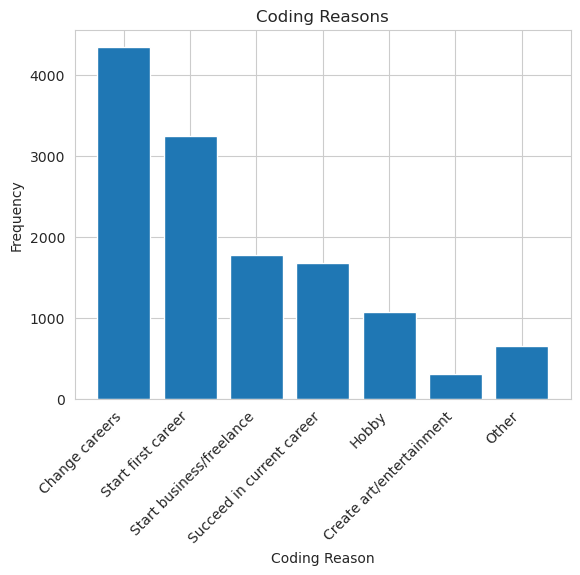

In [46]:
plt.bar(reason_counts.index, reason_counts.values)


plt.xlabel("Coding Reason")
plt.ylabel("Frequency")
plt.title("Coding Reasons")


plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(reason_counts.index)


plt.show()

In [47]:
#Cleaning Gender

def categorize_gender(gender):
    if isinstance(gender, str):
        gender = gender.lower()
        #search for keywords in Gender
        if gender in ['male', 'man', 'boy']:
            return 'Male'
        elif gender in ['female', 'woman', 'girl']:
            return 'Female'
        #regular expression to find variations of keywords in gender
        elif re.search(r'\b(trans|transgender|trans[-\s]?male|trans[-\s]?man|ftm[-\s]?trans|transgender[-\s]?man|trans[-\s]?boy|demiboy|trans[-\s]?nb|trans[-\s]?masc|female|trans[-\s]?female|trans[-\s]?woman|mtf[-\s]?trans|\(trans\)[-s]? woman|trans[-\s]?girl)\b', gender):
            return 'Transgender'
        elif re.search(r'\b(nonbinary|nonbinary[-\s]?woman|nonbinary[-\s]?girl|transmasculine[-\s]?genderqueer|genderfluid|fluid|agender|trans[-\s]?nb|bigender[-\s]?she/her[-\s]?he/him)\b', gender):
            return 'Nonbinary/non-conforming'
    return gender

df_clean['Gender'] = df_clean['Gender'].apply(categorize_gender)

In [48]:
unique_gender = df_clean['Gender'].unique()
gender_counts = df_clean['Gender'].value_counts()

#print("Total Responses:", total_gender_response)
#print ("Missing responses", missing_gender)


unique_genders = df_clean['Gender'].nunique()
print("Number of unique genders:", unique_genders)
#print (unique_gender)
print(gender_counts)

Number of unique genders: 46
Male                                                                             9176
Female                                                                           3401
Nonbinary/non-conforming                                                          242
prefer not to say                                                                 197
Transgender                                                                        18
attack helicopter                                                                   2
universe                                                                            1
pre anything mtf                                                                    1
motiviert, zielstrebend und zuverlässig                                             1
what the actual fuck. i'm male.                                                     1
my gender is: apache helicopter                                                     1
there are just two gender

In [49]:
df_clean['Gender'] = df_clean['Gender'].replace(['Transgender', 'Nonbinary/non-conforming'], 'Transgender/Non-Binary')
desired_genders = ['Male', 'Female', 'Transgender/Non-Binary', 'prefer not to say']
df_clean = df_clean[df_clean['Gender'].isin(desired_genders)]
unique_genders = df_clean['Gender'].unique()
gender_counts = df_clean['Gender'].value_counts()
print(unique_genders)
print(gender_counts)

['prefer not to say' 'Male' 'Female' 'Transgender/Non-Binary']
Male                      9176
Female                    3401
Transgender/Non-Binary     260
prefer not to say          197
Name: Gender, dtype: int64


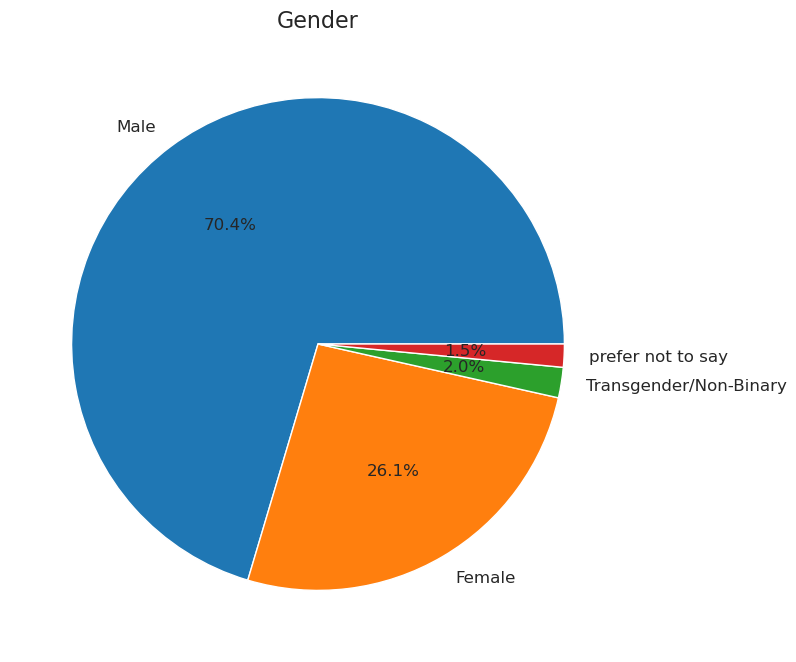

In [50]:
import matplotlib.pyplot as plt


gender_counts = df_clean['Gender'].value_counts()

plt.figure(figsize=(8, 8))


plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', textprops={'fontsize': 12})


plt.title('Gender', fontsize=16)


plt.show()


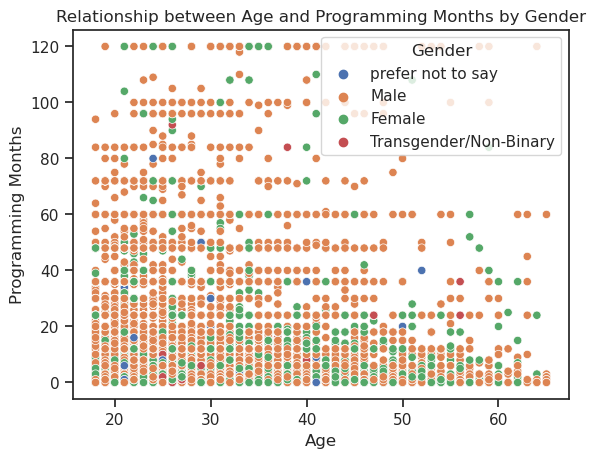

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.scatterplot(x="Age", y="ProgramMonths", hue="Gender", data=df_clean)
plt.xlabel('Age')
plt.ylabel('Programming Months')
plt.title('Relationship between Age and Programming Months by Gender')
plt.show()



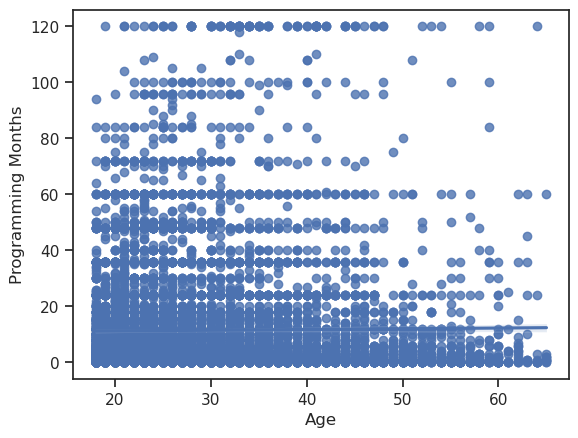

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Age', y='ProgramMonths', data=df_clean)
plt.xlabel('Age')
plt.ylabel('Programming Months')
plt.show()



# Income EDA PART 2
# 

#### EDA: Understand `Income` distribution
* distribution of income for new coders is shown using `countplot()`
* The figure is not good becuase of the messy order of income.
* This will be changed later below


In [53]:
print(df_clean.head())

                          Area   Age                         HighestEducation  \
0      Europe and Central Asia  33.0  Professional degree (MBA, MD, JD, etc.)   
1  Latin America and Caribbean  38.0                        Bachelor’s degree   
3           Sub-Saharan Africa  19.0  High school diploma or equivalent (GED)   
4        East Asia and Pacific  35.0                        Bachelor’s degree   
5                North America  27.0                        Bachelor’s degree   

   ProgramMonths     DegreeStudied              CurrentIndustry  \
0            120  Computer Science  Software development and IT   
1              6  Natural Sciences                    Oilfield    
3             36       Engineering                   Unemployed   
4             24  Computer Science                      Finance   
5             50  Computer Science  Software development and IT   

               CodingReasons             Gender              Income  
0  Succeed in current career  prefer not

In [54]:
df_clean["Income"].unique()

array([nan, 'Under $1,000', '$40,000 to $49,999', '$75,000 to $89,999',
       '$60,000 to $74,999', '$1,000 to $2,999', '$10,000 to $14,999',
       '$20,000 to $24,999', 'None', '$25,000 to $29,999',
       '$30,000 to $34,999', '$3,000 to $4,999', '$15,000 to $19,999',
       '$7,000 to $9,999', '$90,000 to $119,999', '$5,000 to $6,999',
       '$35,000 to $39,999', '$50,000 to $59,999', '$120,000 to $159,999',
       "I don't want to answer", '$200,000 to $249,999',
       '$250,000 or over', 'I don’t know', '$160,000 to $199,999'],
      dtype=object)

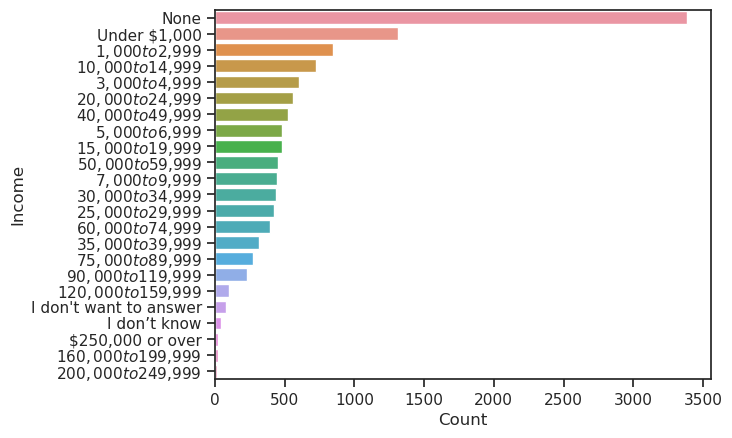

In [55]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
sns.countplot(y='Income', data=df_clean, order=df_clean['Income'].value_counts().index)

# Set axis labels
plt.xlabel("Count")
plt.ylabel("Income")

# Show the plot
plt.show()


### Data preparation
#### Transform the target variable `Income` into two class labels `High (1)` and `Low(0)`
* The target variable `Income` is needed to transform into two class labels `High (1)` and `Low(0)`
* This is a mapping from  `Income` value to 1 and 0
* Get unique values in `Income`

In [56]:
df_clean["Income"].unique()

array([nan, 'Under $1,000', '$40,000 to $49,999', '$75,000 to $89,999',
       '$60,000 to $74,999', '$1,000 to $2,999', '$10,000 to $14,999',
       '$20,000 to $24,999', 'None', '$25,000 to $29,999',
       '$30,000 to $34,999', '$3,000 to $4,999', '$15,000 to $19,999',
       '$7,000 to $9,999', '$90,000 to $119,999', '$5,000 to $6,999',
       '$35,000 to $39,999', '$50,000 to $59,999', '$120,000 to $159,999',
       "I don't want to answer", '$200,000 to $249,999',
       '$250,000 or over', 'I don’t know', '$160,000 to $199,999'],
      dtype=object)

#### Handle missing vcalues in Income 
* All rows with missing values in Column `Income` are dropped because `Income` value is necessary for classification 

* After a manually check from unique values, missing values are identified and then dropped  

In [57]:
missing_income = df_clean['Income'].isnull().sum()
unique_val = df_clean['Income'].unique()

print("Number of missing values for Income: ", missing_income)
print("Unique values for Income: ", unique_val)

Number of missing values for Income:  861
Unique values for Income:  [nan 'Under $1,000' '$40,000 to $49,999' '$75,000 to $89,999'
 '$60,000 to $74,999' '$1,000 to $2,999' '$10,000 to $14,999'
 '$20,000 to $24,999' 'None' '$25,000 to $29,999' '$30,000 to $34,999'
 '$3,000 to $4,999' '$15,000 to $19,999' '$7,000 to $9,999'
 '$90,000 to $119,999' '$5,000 to $6,999' '$35,000 to $39,999'
 '$50,000 to $59,999' '$120,000 to $159,999' "I don't want to answer"
 '$200,000 to $249,999' '$250,000 or over' 'I don’t know'
 '$160,000 to $199,999']


In [58]:
df_clean.dropna(subset=['Income'], inplace=True)
print(df_clean["Income"].unique())
print(df_clean['Income'].value_counts())


['Under $1,000' '$40,000 to $49,999' '$75,000 to $89,999'
 '$60,000 to $74,999' '$1,000 to $2,999' '$10,000 to $14,999'
 '$20,000 to $24,999' 'None' '$25,000 to $29,999' '$30,000 to $34,999'
 '$3,000 to $4,999' '$15,000 to $19,999' '$7,000 to $9,999'
 '$90,000 to $119,999' '$5,000 to $6,999' '$35,000 to $39,999'
 '$50,000 to $59,999' '$120,000 to $159,999' "I don't want to answer"
 '$200,000 to $249,999' '$250,000 or over' 'I don’t know'
 '$160,000 to $199,999']
None                      3388
Under $1,000              1310
$1,000 to $2,999           843
$10,000 to $14,999         727
$3,000 to $4,999           605
$20,000 to $24,999         557
$40,000 to $49,999         520
$5,000 to $6,999           483
$15,000 to $19,999         478
$50,000 to $59,999         453
$7,000 to $9,999           445
$30,000 to $34,999         436
$25,000 to $29,999         426
$60,000 to $74,999         394
$35,000 to $39,999         317
$75,000 to $89,999         275
$90,000 to $119,999        228
$120,0

In [59]:
df_clean.isna().sum()


Area                0
Age                 0
HighestEducation    0
ProgramMonths       0
DegreeStudied       0
CurrentIndustry     0
CodingReasons       0
Gender              0
Income              0
dtype: int64

In [60]:
df_clean = df_clean[df_clean["Income"] != 'I don’t know']
print(df_clean["Income"].unique())

['Under $1,000' '$40,000 to $49,999' '$75,000 to $89,999'
 '$60,000 to $74,999' '$1,000 to $2,999' '$10,000 to $14,999'
 '$20,000 to $24,999' 'None' '$25,000 to $29,999' '$30,000 to $34,999'
 '$3,000 to $4,999' '$15,000 to $19,999' '$7,000 to $9,999'
 '$90,000 to $119,999' '$5,000 to $6,999' '$35,000 to $39,999'
 '$50,000 to $59,999' '$120,000 to $159,999' "I don't want to answer"
 '$200,000 to $249,999' '$250,000 or over' '$160,000 to $199,999']


In [61]:
df_clean = df_clean[df_clean["Income"] != "I don't want to answer"]
print(df_clean["Income"].unique())

['Under $1,000' '$40,000 to $49,999' '$75,000 to $89,999'
 '$60,000 to $74,999' '$1,000 to $2,999' '$10,000 to $14,999'
 '$20,000 to $24,999' 'None' '$25,000 to $29,999' '$30,000 to $34,999'
 '$3,000 to $4,999' '$15,000 to $19,999' '$7,000 to $9,999'
 '$90,000 to $119,999' '$5,000 to $6,999' '$35,000 to $39,999'
 '$50,000 to $59,999' '$120,000 to $159,999' '$200,000 to $249,999'
 '$250,000 or over' '$160,000 to $199,999']


In [62]:
df_clean = df_clean[df_clean["Income"] != 'None']
print(df_clean["Income"].unique())

['Under $1,000' '$40,000 to $49,999' '$75,000 to $89,999'
 '$60,000 to $74,999' '$1,000 to $2,999' '$10,000 to $14,999'
 '$20,000 to $24,999' '$25,000 to $29,999' '$30,000 to $34,999'
 '$3,000 to $4,999' '$15,000 to $19,999' '$7,000 to $9,999'
 '$90,000 to $119,999' '$5,000 to $6,999' '$35,000 to $39,999'
 '$50,000 to $59,999' '$120,000 to $159,999' '$200,000 to $249,999'
 '$250,000 or over' '$160,000 to $199,999']


In [63]:
num_rows = df_clean.shape[0]
print (num_rows)

8661


In [64]:
#try to visualise the code again for income in order

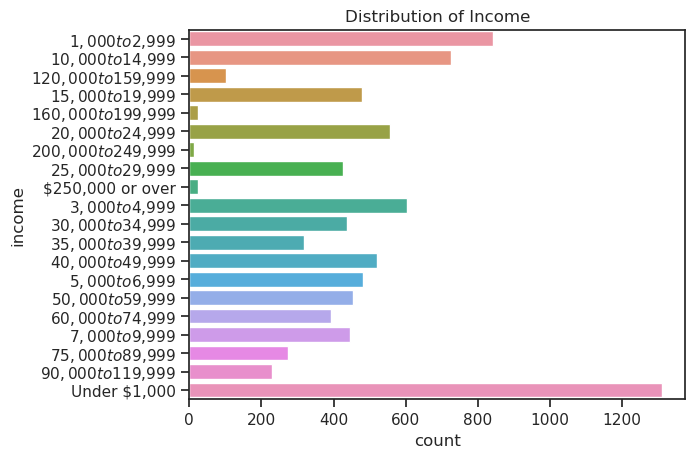

In [65]:
# Get the unique values in the "Income" column and sort them in ascending order
income_order = df_clean['Income'].unique()
income_order.sort()

# Create a countplot using seaborn
sns.countplot(y='Income', data=df_clean, order=income_order)

# Set the x and y labels and title
plt.xlabel("count")
plt.ylabel("income")
plt.title("Distribution of Income")

# Show the plot
plt.show()


#### Ordinal-encoding `Income`
* `income` belongs to ordinal data
* It is encoded as a numeric value with an order
* The encoded value is put into a new column `IncomeLevel`

In [66]:

from sklearn.preprocessing import OrdinalEncoder
income_level_order = [[
                       'Under $1,000',
                       '$1,000 to $2,999',
                       '$3,000 to $4,999',
                       '$5,000 to $6,999', 
                       '$7,000 to $9,999',
                       '$10,000 to $14,999',
                       '$15,000 to $19,999',
                       '$20,000 to $24,999',
                       '$25,000 to $29,999',
                       '$30,000 to $34,999', 
                       '$35,000 to $39,999',
                       '$40,000 to $49,999',
                       '$50,000 to $59,999',
                       '$60,000 to $74,999',
                       '$75,000 to $89,999',
                       '$90,000 to $119,999',
                       '$120,000 to $159,999',
                       '$160,000 to $199,999', 
                       '$200,000 to $249,999',
                       '$250,000 or over',]] 
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories = income_level_order)  
df_clean['IncomeLevel'] = encoder.fit_transform(df_clean[['Income']])

print(df_clean.shape[0])
#print(df_clean['IncomeLevel'])
print("Total rows: ", len(df_clean['IncomeLevel']))

8661
Total rows:  8661


* Visualize `Income` in levels. The figure is better

<AxesSubplot:xlabel='count', ylabel='IncomeLevel'>

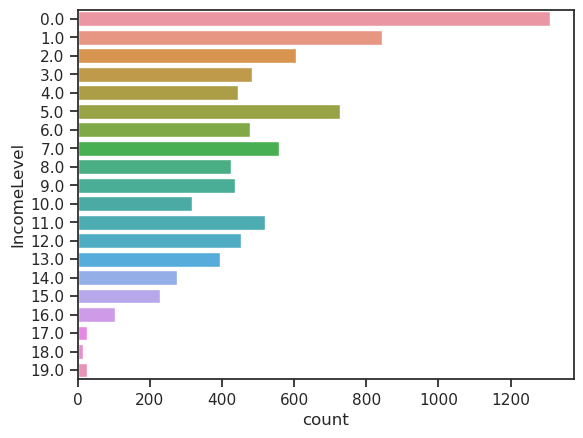

In [67]:
sns.countplot(y='IncomeLevel', data=df_clean)

* Created a new feature `HighIncome`: =0 (false) if y < 9, otherwise =1 (true)


In [68]:
df_clean['HighIncome'] = df_clean['IncomeLevel'].apply(lambda x:0 if x < 9 else 1)
df_clean.head()

,Area,Age,HighestEducation,ProgramMonths,DegreeStudied,CurrentIndustry,CodingReasons,Gender,Income,IncomeLevel,HighIncome
1,Latin America and Caribbean,38.0,Bachelor’s degree,6,Natural Sciences,Oilfield,Change careers,Male,"Under $1,000",0.0,0
4,East Asia and Pacific,35.0,Bachelor’s degree,24,Computer Science,Finance,Start first career,Male,"$40,000 to $49,999",11.0,1
5,North America,27.0,Bachelor’s degree,50,Computer Science,Software development and IT,Succeed in current career,Male,"$75,000 to $89,999",14.0,1
6,North America,24.0,"Some college credit, no degree",36,Business and Management,Software development and IT,Start first career,Male,"$60,000 to $74,999",13.0,1
7,Europe and Central Asia,23.0,Bachelor’s degree,30,Engineering,Software development and IT,Hobby,Male,"$1,000 to $2,999",1.0,0


#### EDA:  understand High Income and Low Income
* So far, a new column `HighIncome` is added to DataFrame `df_clean`. This is the class label that will be used in this project

<AxesSubplot:xlabel='count', ylabel='HighIncome'>

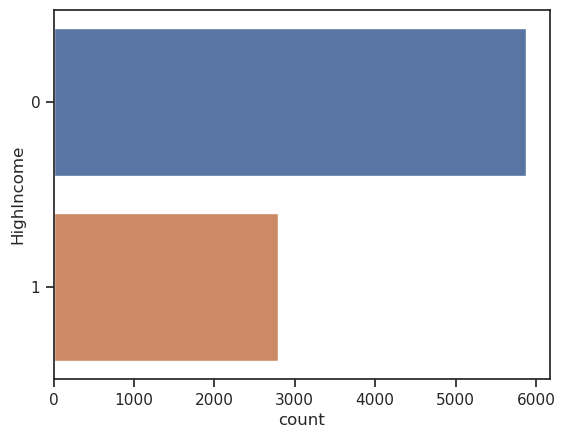

In [69]:
sns.countplot(y='HighIncome', data=df_clean)

In [70]:
 df_clean.isna().sum()

Area                0
Age                 0
HighestEducation    0
ProgramMonths       0
DegreeStudied       0
CurrentIndustry     0
CodingReasons       0
Gender              0
Income              0
IncomeLevel         0
HighIncome          0
dtype: int64

In [71]:
num_records = df_clean.shape[0]
print("Total records in df:", num_records)

Total records in df: 8661


## Part 3 Classification
#### Predictors X
* Chosen predictors X



In [72]:

X = df_clean[['Area','Age','HighestEducation','ProgramMonths','DegreeStudied','CurrentIndustry','CodingReasons','Gender']] 
X.head()


,Area,Age,HighestEducation,ProgramMonths,DegreeStudied,CurrentIndustry,CodingReasons,Gender
1,Latin America and Caribbean,38.0,Bachelor’s degree,6,Natural Sciences,Oilfield,Change careers,Male
4,East Asia and Pacific,35.0,Bachelor’s degree,24,Computer Science,Finance,Start first career,Male
5,North America,27.0,Bachelor’s degree,50,Computer Science,Software development and IT,Succeed in current career,Male
6,North America,24.0,"Some college credit, no degree",36,Business and Management,Software development and IT,Start first career,Male
7,Europe and Central Asia,23.0,Bachelor’s degree,30,Engineering,Software development and IT,Hobby,Male


* Choose target y

In [73]:
y = df_clean[['HighIncome']]
y.head()

,HighIncome
1,0
4,1
5,1
6,1
7,0


In [74]:
print(X.shape) # this should print (8786, n_features) where n_features is the total number of features after one-hot encoding and scaling
print(y.shape) # this should print (8786,)


(8661, 8)
(8661, 1)


#### Encode Area
* due to nominal data, using OneHot encoder

In [75]:
X = pd.get_dummies(X) #OneHot Encoding.
X.head()

,Age,ProgramMonths,Area_East Asia and Pacific,Area_Europe and Central Asia,Area_Latin America and Caribbean,Area_Middle East and North Africa,Area_North America,Area_South Asia,Area_Southeast Asia,Area_Sub-Saharan Africa,...,CodingReasons_to teach it,"CodingReasons_to understand better the crytpoassets world, and be a better cryptoinvestor; but also for fun and be a freelancer sounds not bad",CodingReasons_to understand world in digital era,CodingReasons_understanding life,CodingReasons_work,"CodingReasons_worried about my future job opportunities, to learn something 'useful'",Gender_Female,Gender_Male,Gender_Transgender/Non-Binary,Gender_prefer not to say
1,38.0,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,35.0,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,27.0,50,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,24.0,36,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,23.0,30,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Split data into two parts: training and test 
* 70% for training and 30% for test


In [76]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #split data
print(X_train[0:5])

        Age  ProgramMonths  Area_East Asia and Pacific  \
14929  33.0             18                           0   
4073   26.0              0                           0   
5222   35.0             12                           1   
5431   34.0              0                           0   
12376  53.0              8                           0   

       Area_Europe and Central Asia  Area_Latin America and Caribbean  \
14929                             0                                 1   
4073                              0                                 0   
5222                              0                                 0   
5431                              0                                 0   
12376                             0                                 0   

       Area_Middle East and North Africa  Area_North America  Area_South Asia  \
14929                                  0                   0                0   
4073                                   0          

#### Building model
* decision tree.

In [77]:
from sklearn import tree 
from sklearn import metrics 
dt = tree.DecisionTreeClassifier(max_depth = 10)  #build decision tree

* training the model

In [78]:
dt = dt.fit(X_train, y_train) #fit decision tree

#### Evaluating the model
* Predicting the class label of records on test data

In [79]:
y_pred = dt.predict(X_test)

* Print the accuracy of the model on the test data

In [80]:
Accuracy = metrics.accuracy_score(y_test, y_pred) 
print ("Accuracy: ", Accuracy) 
 

Accuracy:  0.7991535205848403


In [81]:
#Hyper tuning Decision Tree



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

x = df_clean[['Area','Age','HighestEducation','ProgramMonths','DegreeStudied','CurrentIndustry','CodingReasons','Gender']] 

X = pd.get_dummies(x)


y = df_clean['HighIncome']

# 70/30
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10]
}

#  decision tree func 
dt = DecisionTreeClassifier()

#GridSearchCV func
grid_search = GridSearchCV(dt, hyperparameters, cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)


# best estimator 
y_pred = grid_search.best_estimator_.predict(x_test)

dt = DecisionTreeClassifier(**grid_search.best_params_)
dt.fit(x_train, y_train)


y_pred_prob = grid_search.best_estimator_.predict_proba(x_test)[:, 1]

#  Evaluation  
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cmatrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Print the best hyperparameters and metric results
print("Chosen Hyperparameters: ", grid_search.best_params_)
print("Chosen Accuracy score: ", grid_search.best_score_)
print("AUC Score: ", auc_score)
print("F1 Score: ", f1)


Chosen Hyperparameters:  {'criterion': 'gini', 'max_depth': 4}
Chosen Accuracy score:  0.7970944580030962
AUC Score:  0.8517859058962391
F1 Score:  0.6309444072337576


#### Visulize the tree

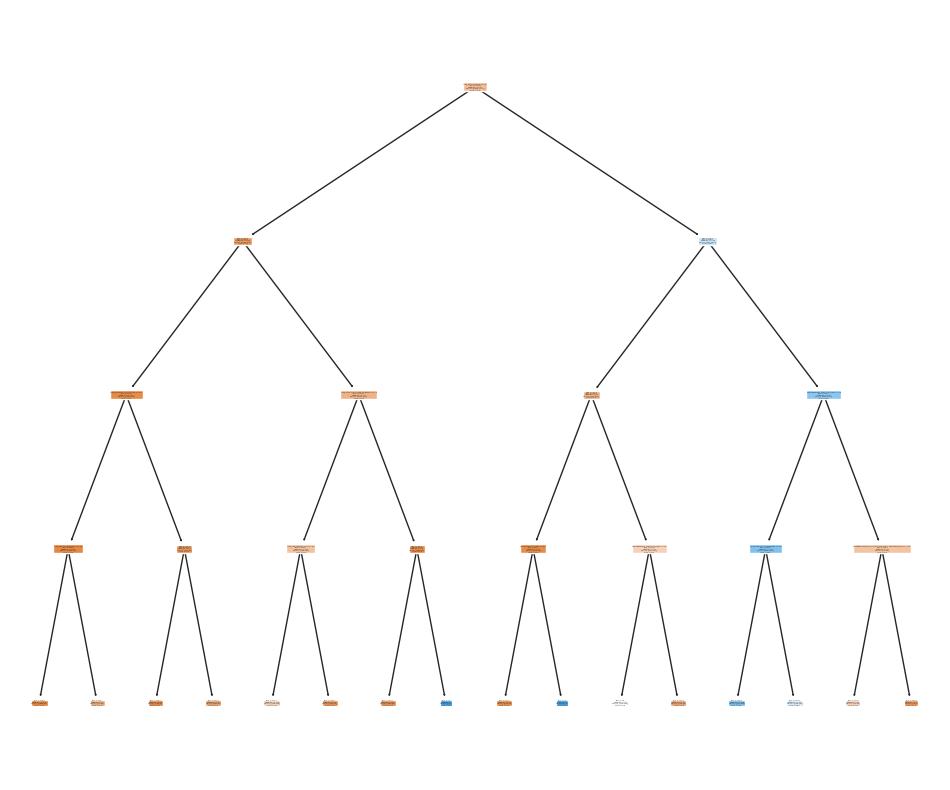

In [82]:
from sklearn import tree 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10)) #plot the decision tree
_ = tree.plot_tree(dt, feature_names=X.columns, class_names=["Low", "High"],  filled=True)

# Save the figure as a PNG image
plt.savefig("decision_tree.png")


# **Logistic Regression Implementation**

In [83]:
print(df_clean.shape[0]) # this should print 8786 if there are no missing values


8661


In [84]:
print(X.shape) # this should print (8786, n_features) where n_features is the total number of features after one-hot encoding and scaling
print(y.shape) # this should print (8786,)


(8661, 1308)
(8661,)


In [85]:
print(df_clean.shape)


(8661, 11)


In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix



cat_column = ['Area','HighestEducation','DegreeStudied','CurrentIndustry','CodingReasons','Gender']
n_column = ['Age', 'ProgramMonths']

# one-hot encode 
x_cat = pd.get_dummies(df_clean[cat_column])

# scale numerical features using MinMaxScaler
x_num = pd.DataFrame(MinMaxScaler().fit_transform(df_clean[n_column]), columns=n_column)

#balances them back to 8786 rows so they can be trained & split
x_cat = x_cat.reset_index(drop=True)
x_num = x_num.reset_index(drop=True)

# concatenation for one hot and minmaxscale
X = pd.concat([x_cat, x_num], axis=1)
# Target variable
y = df_clean['HighIncome']


In [87]:
print(X.shape) # this should print (8786, n_features) where n_features is the total number of features after one-hot encoding and scaling
print(y.shape) # this should print (8786,)

(8661, 1308)
(8661,)


In [88]:
print(x_num.shape)

(8661, 2)


In [89]:
#tuning parameters 

# logistic regression model
lreg = LogisticRegression()

hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg'],
    'max_iter': [1000, 5000]
}

#split train test data 70/30
#random state added to make results reproducible
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)




grid_search = GridSearchCV(lreg, hyperparameters, cv=5, n_jobs=-1)


grid_search.fit(x_train, y_train)

# predict on the test set using the best estimator found by grid search
y_pred = grid_search.best_estimator_.predict(x_test)

#predict probability for class 1 auc score
y_pred_prob = grid_search.predict_proba(x_test)[:, 1]

# Evaluation  
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cmatrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
 


# best hyperparameters and metric results
print("Chosen Hyperparameters: ", grid_search.best_params_)
print("Chosen Accuracy score: ", grid_search.best_score_)
print ("AUC Score: ", auc_score)
print ("F1 Score: ", f1 )


Chosen Hyperparameters:  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Chosen Accuracy score:  0.8074875047273895
AUC Score:  0.8676280245721337
F1 Score:  0.6969696969696969


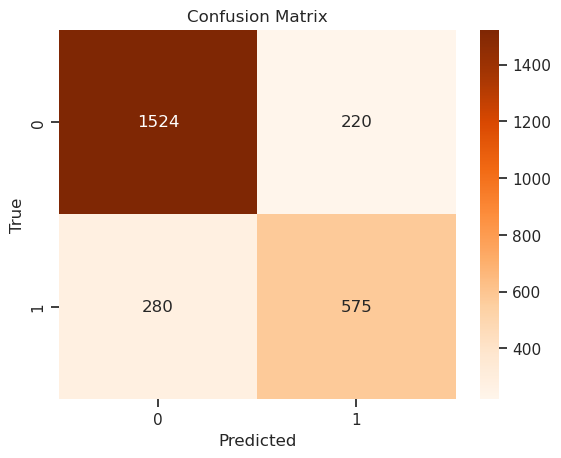

In [90]:
#Visualise Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt




sns.heatmap(cmatrix, annot=True, fmt='g', cmap='Oranges')


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()


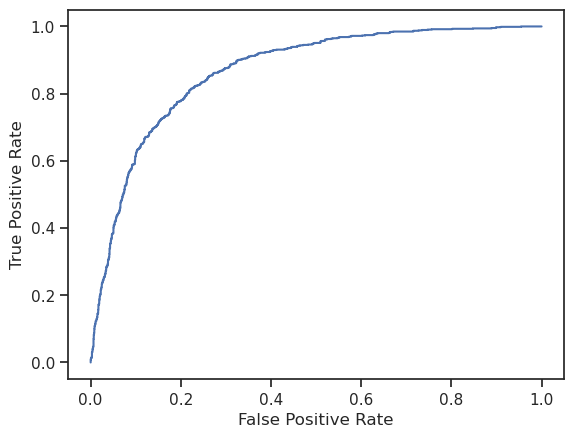

In [91]:
from sklearn.metrics import roc_curve

# predict probability for class 1 auc score
y_pred_prob = grid_search.best_estimator_.predict_proba(x_test)[:, 1]

#fpr, tpr,
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#  ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# # # # # # **KNN**

In [92]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix



cat_column = ['Area', 'HighestEducation', 'DegreeStudied', 'CurrentIndustry', 'CodingReasons', 'Gender']
n_column = ['Age', 'ProgramMonths']


x_cat = pd.get_dummies(df_clean[cat_column])

# MinMaxScaler transform
x_num = pd.DataFrame(MinMaxScaler().fit_transform(df_clean[n_column]), columns=n_column)
                                                        
x_cat = x_cat.reset_index(drop=True)
x_num = x_num.reset_index(drop=True)

# concatenation for one hot and minxmaxscale
x = pd.concat([x_cat, x_num], axis=1)

# Target variable
y = df_clean['HighIncome']

#split train test data 70/30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean']}


knn = KNeighborsClassifier()


grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)



grid_search.fit(x_train, y_train)


y_pred = grid_search.best_estimator_.predict(x_test)

#predict probability for class 1 auc score
y_pred_prob = grid_search.predict_proba(x_test)[:, 1]

# Evaluation  
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
cmatrix = confusion_matrix(y_test, y_pred)

# best hyperparameters and metric results
print("Chosen Hyperparameters: ", grid_search.best_params_)
print("Chosen Accuracy score: ", grid_search.best_score_)
print ("AUC Score: ", auc_score)
print ("F1 Score: ", f1 )

Chosen Hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Chosen Accuracy score:  0.7901678461333355
AUC Score:  0.8286154031868662
F1 Score:  0.6572307692307693


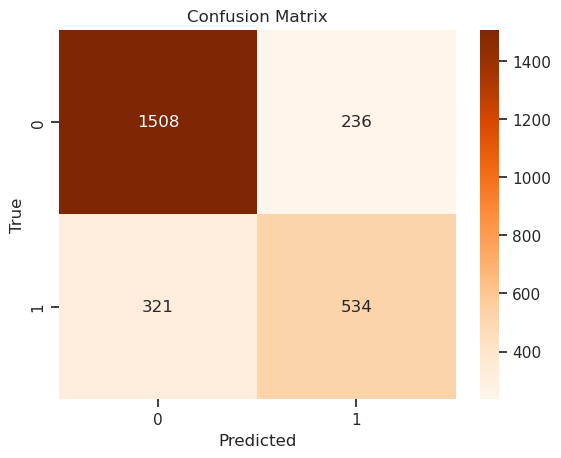

In [93]:

#Visualise Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt



# plot confusion matrix as heatmap
sns.heatmap(cmatrix, annot=True, fmt='g', cmap='Oranges')

# set plot labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()


# # # **Decision Tree With Bagging**

In [94]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd



x = df_clean[['Area', 'Age', 'HighestEducation', 'ProgramMonths', 'DegreeStudied', 'CurrentIndustry', 'CodingReasons', 'Gender']]
X = pd.get_dummies(x)
y = df_clean['HighIncome']

# Split train/test data 70/30
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define hyperparameters to tune
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10]
}


dt = DecisionTreeClassifier()


grid_search = GridSearchCV(dt, hyperparameters, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and create decision tree object
best_params = grid_search.best_params_
dt = DecisionTreeClassifier(**best_params)

#  bagging object dtree estimator
bagging = BaggingClassifier(dt, n_estimators=50, random_state=1)


bagging.fit(x_train, y_train)

# Predict on the test set using the bagging classifier
y_pred = bagging.predict(x_test)

# Get the predicted probabilities for the positive class
y_pred_prob = bagging.predict_proba(x_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cmatrix = confusion_matrix(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Print the best hyperparameters and metric results
print("Chosen Hyperparameters: ", best_params)
print("AUC Score: ", auc_score)
print("F1 Score: ", f1)
print("Accuracy Score: ", accuracy)


Chosen Hyperparameters:  {'criterion': 'gini', 'max_depth': 4}
AUC Score:  0.8654179408766565
F1 Score:  0.6733542319749216
Accuracy Score:  0.7995382839553674


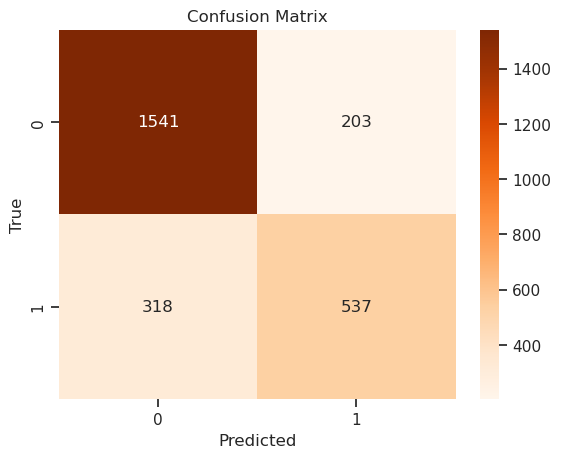

In [95]:
#Visualise Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt




sns.heatmap(cmatrix, annot=True, fmt='g', cmap='Oranges')


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()


# # # # **KNN BAGGING**

In [96]:
#KNN with Bagging

#KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier



cat_column = ['Area', 'HighestEducation', 'DegreeStudied', 'CurrentIndustry', 'CodingReasons', 'Gender']
n_column = ['Age', 'ProgramMonths']

x_cat = pd.get_dummies(df_clean[cat_column])

# MinMaxScaler transform
x_num = pd.DataFrame(MinMaxScaler().fit_transform(df_clean[n_column]), columns=n_column)
                                                        
x_cat = x_cat.reset_index(drop=True)
x_num = x_num.reset_index(drop=True)

# concatenation for one hot and minxmaxscale
x = pd.concat([x_cat, x_num], axis=1)

# Target variable
y = df_clean['HighIncome']

#split train test data 70/30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)



knn = KNeighborsClassifier()
bagging = BaggingClassifier(base_estimator=knn)

params = {'base_estimator__n_neighbors': [3, 5, 7, 9, 11],
              'base_estimator__weights': ['uniform', 'distance'],
              'base_estimator__metric': ['euclidean'], }


grid_search = GridSearchCV(bagging, param_grid=params, cv=5, n_jobs=-1)


grid_search.fit(x_train, y_train)


y_pred = grid_search.best_estimator_.predict(x_test)


y_pred_prob = grid_search.predict_proba(x_test)[:, 1]

# Evaluation  
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
cmatrix = confusion_matrix(y_test, y_pred)

# best hyperparameters and metric results
print("Chosen Hyperparameters: ", grid_search.best_params_)
print("Chosen Accuracy score: ", grid_search.best_score_)
print ("AUC Score: ", auc_score)
print ("F1 Score: ", f1 )

Chosen Hyperparameters:  {'base_estimator__metric': 'euclidean', 'base_estimator__n_neighbors': 11, 'base_estimator__weights': 'distance'}
Chosen Accuracy score:  0.7880244001316867
AUC Score:  0.8267389613176672
F1 Score:  0.6405867970660146


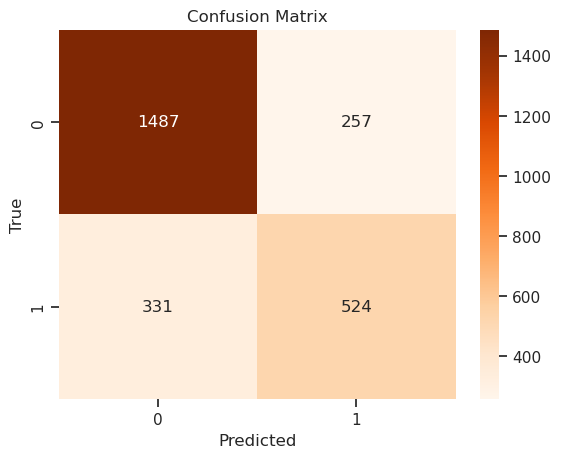

In [97]:
#Visualise Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt




sns.heatmap(cmatrix, annot=True, fmt='g', cmap='Oranges')


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()


# # # **LOGISTIC REGRESSION BAGGING**

# # # **NEW VERSION**

## Part 4 Cluster Analysis
### Data for clustering
* Clutser analysis uses the cleaned data `df_clean`

In [98]:
df_clean.head()

,Area,Age,HighestEducation,ProgramMonths,DegreeStudied,CurrentIndustry,CodingReasons,Gender,Income,IncomeLevel,HighIncome
1,Latin America and Caribbean,38.0,Bachelor’s degree,6,Natural Sciences,Oilfield,Change careers,Male,"Under $1,000",0.0,0
4,East Asia and Pacific,35.0,Bachelor’s degree,24,Computer Science,Finance,Start first career,Male,"$40,000 to $49,999",11.0,1
5,North America,27.0,Bachelor’s degree,50,Computer Science,Software development and IT,Succeed in current career,Male,"$75,000 to $89,999",14.0,1
6,North America,24.0,"Some college credit, no degree",36,Business and Management,Software development and IT,Start first career,Male,"$60,000 to $74,999",13.0,1
7,Europe and Central Asia,23.0,Bachelor’s degree,30,Engineering,Software development and IT,Hobby,Male,"$1,000 to $2,999",1.0,0


#### Select features for clustering

In [99]:
df_cluster = df_clean[['Area','Age','HighestEducation','ProgramMonths','DegreeStudied','CurrentIndustry','CodingReasons','Gender','IncomeLevel']]
df_cluster.head()

,Area,Age,HighestEducation,ProgramMonths,DegreeStudied,CurrentIndustry,CodingReasons,Gender,IncomeLevel
1,Latin America and Caribbean,38.0,Bachelor’s degree,6,Natural Sciences,Oilfield,Change careers,Male,0.0
4,East Asia and Pacific,35.0,Bachelor’s degree,24,Computer Science,Finance,Start first career,Male,11.0
5,North America,27.0,Bachelor’s degree,50,Computer Science,Software development and IT,Succeed in current career,Male,14.0
6,North America,24.0,"Some college credit, no degree",36,Business and Management,Software development and IT,Start first career,Male,13.0
7,Europe and Central Asia,23.0,Bachelor’s degree,30,Engineering,Software development and IT,Hobby,Male,1.0


#### Encode Area
* `Area` is categorical data without order, so OneHot Encoder was used

In [100]:
X_cluster = pd.get_dummies(df_cluster) #OneHot Encoding. 
X_cluster.head()

,Age,ProgramMonths,IncomeLevel,Area_East Asia and Pacific,Area_Europe and Central Asia,Area_Latin America and Caribbean,Area_Middle East and North Africa,Area_North America,Area_South Asia,Area_Southeast Asia,...,CodingReasons_to teach it,"CodingReasons_to understand better the crytpoassets world, and be a better cryptoinvestor; but also for fun and be a freelancer sounds not bad",CodingReasons_to understand world in digital era,CodingReasons_understanding life,CodingReasons_work,"CodingReasons_worried about my future job opportunities, to learn something 'useful'",Gender_Female,Gender_Male,Gender_Transgender/Non-Binary,Gender_prefer not to say
1,38.0,6,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,35.0,24,11.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,27.0,50,14.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,24.0,36,13.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,23.0,30,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Cluster the data 
* clustering data  into a few groups using the K-Mean clustering method

In [101]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)  

* fit on the data and predict the group label
* Added a new column in `df_cluster` called ClutserLabel

In [102]:
y_cluster = km.fit_predict(X_cluster)
print(y_cluster[0:5])
df_cluster['ClusterLabel'] = y_cluster 
df_cluster.head()

[0 0 1 1 0]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Area,Age,HighestEducation,ProgramMonths,DegreeStudied,CurrentIndustry,CodingReasons,Gender,IncomeLevel,ClusterLabel
1,Latin America and Caribbean,38.0,Bachelor’s degree,6,Natural Sciences,Oilfield,Change careers,Male,0.0,0
4,East Asia and Pacific,35.0,Bachelor’s degree,24,Computer Science,Finance,Start first career,Male,11.0,0
5,North America,27.0,Bachelor’s degree,50,Computer Science,Software development and IT,Succeed in current career,Male,14.0,1
6,North America,24.0,"Some college credit, no degree",36,Business and Management,Software development and IT,Start first career,Male,13.0,1
7,Europe and Central Asia,23.0,Bachelor’s degree,30,Engineering,Software development and IT,Hobby,Male,1.0,0


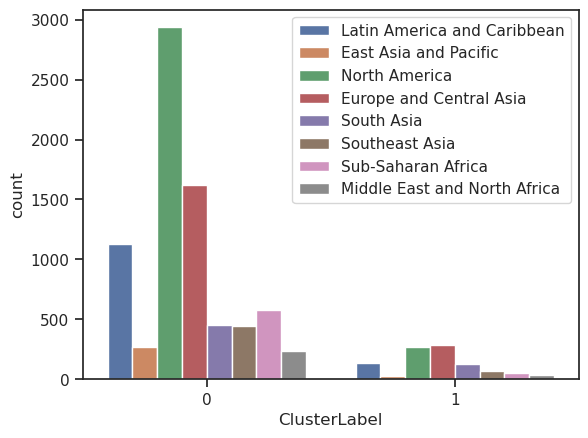

In [103]:
import seaborn as sns
sns.countplot(data=df_cluster, x="ClusterLabel", hue="Area")
plt.legend(bbox_to_anchor=(1.0, 1.0))

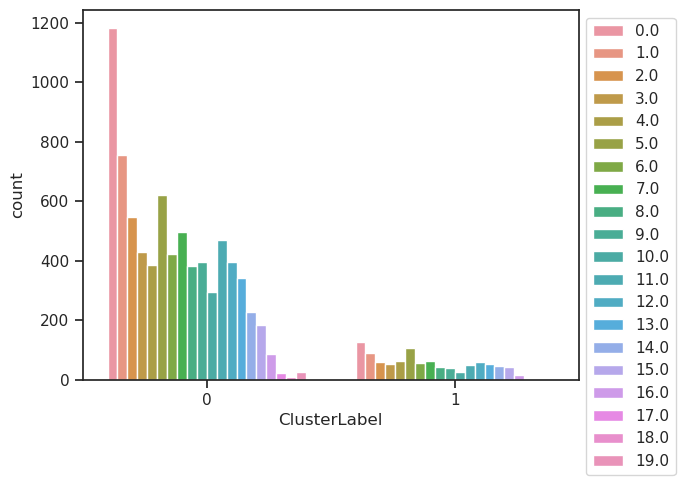

In [104]:
import seaborn as sns
sns.countplot(data=df_cluster, x="ClusterLabel", hue="IncomeLevel")
plt.legend(bbox_to_anchor=(1.0, 1.0))